In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets\Train'
valid_path = 'Datasets\Test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
import scipy
from scipy import interpolate
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
2/2 [==============================] - 12s 6s/step - loss: 7.8563 - accuracy: 0.2656 - val_loss: 9.8298 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 6s 5s/step - loss: 5.0082 - accuracy: 0.4688 - val_loss: 2.6941 - val_accuracy: 0.1724
Epoch 3/50
2/2 [==============================] - 6s 5s/step - loss: 4.8351 - accuracy: 0.3281 - val_loss: 4.5376 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 6s 4s/step - loss: 3.9294 - accuracy: 0.3438 - val_loss: 4.3949 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 6s 4s/step - loss: 3.3465 - accuracy: 0.4531 - val_loss: 8.4511 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 6s 5s/step - loss: 5.0850 - accuracy: 0.4375 - val_loss: 8.2124 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 6s 4s/step - loss: 4.5193 - accuracy: 0.4531 - val_loss: 4.0238 - val_accuracy: 0.3103
Epoch 8/50
2/2 [========================

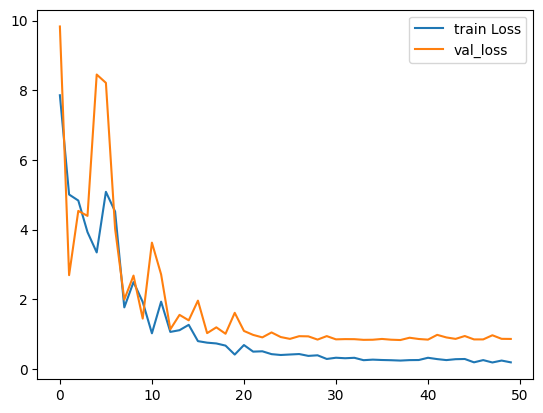

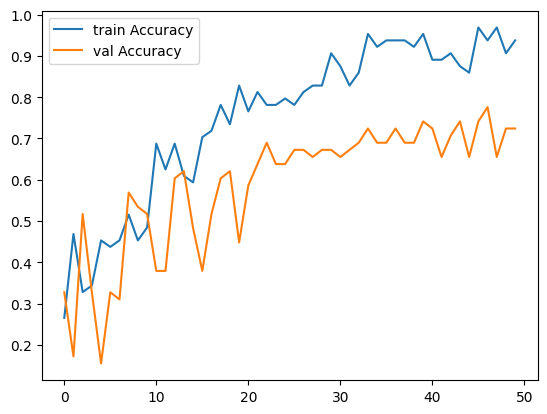

In [18]:
## plot the loss


plt.plot(r.history['loss'] , label = 'train Loss')
plt.plot(r.history['val_loss'] , label = 'val_loss')
plt.legend()
plt.show()

## plot the accuracy

plt.plot(r.history['accuracy'] , label = 'train Accuracy')
plt.plot(r.history['val_accuracy'] , label = 'val Accuracy')
plt.legend()
plt.show()

In [19]:
y_pred=model.predict(test_set)

2/2 [==============================] - 5s 1s/step


In [20]:
y_pred

array([[1.31126210e-01, 2.14095563e-01, 6.54778242e-01],
       [7.57931048e-05, 6.26967230e-04, 9.99297261e-01],
       [2.22689378e-05, 2.40701297e-03, 9.97570693e-01],
       [1.92760259e-01, 6.74161553e-01, 1.33078203e-01],
       [6.51009083e-02, 5.77508569e-01, 3.57390463e-01],
       [3.18621751e-04, 9.97157454e-01, 2.52396567e-03],
       [2.85452828e-02, 7.07165837e-01, 2.64288872e-01],
       [2.09397703e-01, 6.50668979e-01, 1.39933318e-01],
       [3.95941436e-02, 4.93520170e-01, 4.66885686e-01],
       [4.36134124e-03, 9.60581481e-01, 3.50572467e-02],
       [1.33361621e-02, 9.71104920e-01, 1.55588808e-02],
       [2.12227609e-02, 3.04680015e-03, 9.75730419e-01],
       [6.26914436e-03, 7.33880818e-01, 2.59850055e-01],
       [1.40380943e-02, 9.50207949e-01, 3.57539542e-02],
       [6.57689929e-01, 3.02526563e-01, 3.97834890e-02],
       [1.13212042e-01, 5.74767649e-01, 3.12020302e-01],
       [2.43638754e-02, 8.37754965e-01, 1.37881204e-01],
       [8.09877396e-01, 2.03066

In [21]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [22]:
y_pred

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1], dtype=int64)

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
img=image.load_img('Datasets/Test/mercedes/41.jpg' ,target_size=(224,224))


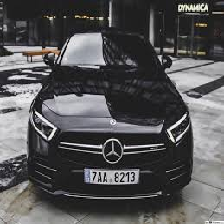

In [26]:
img

In [27]:
image

<module 'tensorflow.keras.preprocessing.image' from 'C:\\Users\\Hp\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\keras\\api\\_v2\\keras\\preprocessing\\image\\__init__.py'>

In [28]:
x=image.img_to_array(img)
x

array([[[ 45.,  45.,  45.],
        [ 31.,  31.,  31.],
        [ 32.,  32.,  32.],
        ...,
        [ 30.,  23.,  30.],
        [ 30.,  23.,  30.],
        [ 30.,  23.,  30.]],

       [[ 23.,  23.,  23.],
        [ 36.,  36.,  36.],
        [ 28.,  28.,  28.],
        ...,
        [ 62.,  57.,  63.],
        [ 62.,  57.,  64.],
        [ 62.,  57.,  64.]],

       [[107., 107., 107.],
        [126., 126., 126.],
        [ 83.,  83.,  83.],
        ...,
        [ 89.,  88.,  94.],
        [ 89.,  88.,  96.],
        [ 90.,  89.,  97.]],

       ...,

       [[165., 163., 164.],
        [171., 170., 168.],
        [184., 183., 181.],
        ...,
        [255., 253., 254.],
        [254., 252., 255.],
        [252., 250., 253.]],

       [[180., 180., 178.],
        [164., 165., 160.],
        [157., 158., 153.],
        ...,
        [203., 203., 203.],
        [208., 208., 208.],
        [216., 216., 216.]],

       [[171., 173., 168.],
        [169., 171., 166.],
        [164., 1

In [29]:
x.shape

(224, 224, 3)

In [30]:
x=x/255 #resize the data

In [31]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [32]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[0.42785245, 0.03816835, 0.53397924]], dtype=float32)

In [33]:
a=np.argmax(model.predict(img_data),axis=1)
print(a)

1/1 [==============================] - 0s 119ms/step
[2]


In [34]:
from tensorflow.keras.models import load_model

model.save('artifacts/model_restnet50.h5')

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
